데이터셋 다운

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


데이터 확인하기

[47919 15931 52134 40535 36785 26695 54941 10879 28788]


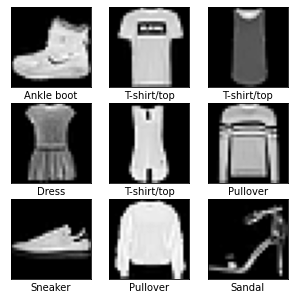

In [6]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size=9
random_idx = np.random.randint(60000, size=sample_size)
print(random_idx)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])
plt.show()

전처리 및 검증 데이터셋 만들기

In [7]:
x_train = x_train/255
x_test = x_test/255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

첫번째 모델 구성

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

학습과정 설정

In [12]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

학습하기

In [13]:
history1 = model1.fit(x_train, y_train,
                      epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.6634 - acc: 0.7742 - val_loss: 0.4643 - val_acc: 0.8386
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4384 - acc: 0.8470 - val_loss: 0.4248 - val_acc: 0.8543
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3983 - acc: 0.8595 - val_loss: 0.4101 - val_acc: 0.8554
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3732 - acc: 0.8674 - val_loss: 0.3812 - val_acc: 0.8663
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3534 - acc: 0.8725 - val_loss: 0.3658 - val_acc: 0.8733
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3369 - acc: 0.8794 - val_loss: 0.3581 - val_acc: 0.8762
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3224 - acc: 0.8826 - val_loss: 0.3845 - val_acc: 0.8671
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.

두번째 모델 구성 - more deeper

In [14]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [16]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history2 = model2.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 8ms/step - loss: 0.3424 - acc: 0.8747 - val_loss: 0.3752 - val_acc: 0.8617
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3211 - acc: 0.8803 - val_loss: 0.3489 - val_acc: 0.8701
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3048 - acc: 0.8875 - val_loss: 0.3293 - val_acc: 0.8808
Epoch 4/30
329/329 [==============================] - 3s 9ms/step - loss: 0.2877 - acc: 0.8930 - val_loss: 0.3187 - val_acc: 0.8855
Epoch 5/30
329/329 [==============================] - 4s 13ms/step - loss: 0.2772 - acc: 0.8979 - val_loss: 0.3217 - val_acc: 0.8842
Epoch 6/30
329/329 [==============================] - 3s 10ms/step - loss: 0.2639 - acc: 0.9013 - val_loss: 0.3489 - val_acc: 0.8758
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.2605 - acc: 0.9020 - val_loss: 0.3097 - val_acc: 0.8889
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - loss: 

두 모델의 학습과정 그리기

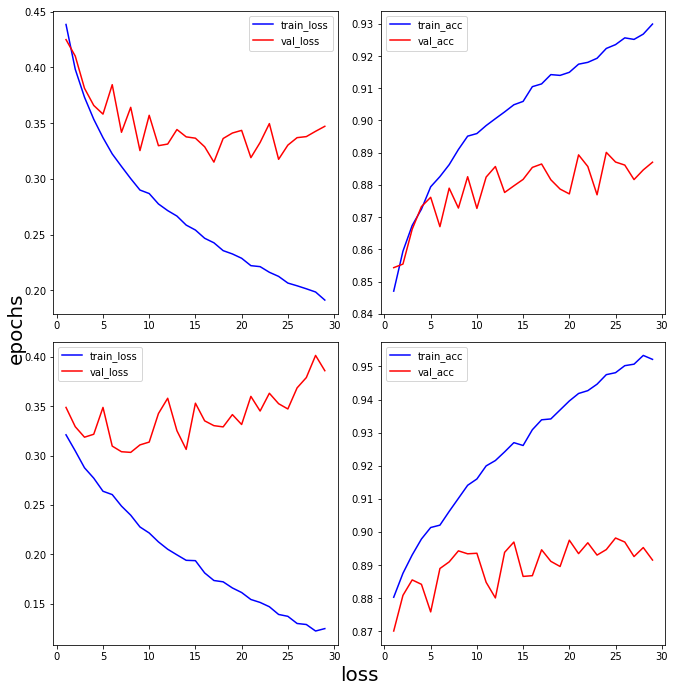

In [18]:
def draw_loss_acc(history1, history2, epochs):
  hist_dict1 = history1.history
  hist_dict2 = history2.history
  keys = list(hist_dict1.keys())

  epochs = range(1,epochs)
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1,1,1)

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

  for i in range(len(hist_dict1)):
    temp_ax = fig.add_subplot(2,2,i+1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2+2]
    temp_history = hist_dict1 if i<2 else hist_dict2
    temp_ax.plot(epochs, temp_history[temp][1:],
                 color='blue', label='train_'+temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:],
                 color='red', label=val_temp)
    if (i==1 or i==3):
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start,2), end, 0.01))
    temp_ax.legend()
  ax.set_xlabel('loss', size=20)
  ax.set_ylabel('epochs', size=20)
  plt.tight_layout()
  plt.show()

draw_loss_acc(history1, history2, 30)

- 모델을 깊게 구성하면 높은 성능을 얻을 수 있지만, 모델이 가지는 파라미터의 수가 매우 많아지기 때문에 과대적합 문제에도 많이 노풀될 수 있습니다.
- 어느정도가 적절한 모델의 깊이인지 파악하기 어렵다면, 유명한 데이터셋이나 유사한 분야에서 높은 성능을 보여준 모델의 구조를 참고하여 구성해보고 실험을 진행하는 것이 좋습니다.